In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from PIL import Image
import numpy as np
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import datetime

# Load the TensorBoard notebook extension
%load_ext tensorboard

In [2]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Creating Original Training Dataset of 50000 records

original_train_images=X_train[:50000,:,:]
original_train_labels=y_train[:50000,]

print(original_train_images.shape)
print(original_train_labels.shape)

(50000, 28, 28)
(50000,)


In [5]:
# Applied Data Augmentation by rotating images counter-clockwise by 180 Degrees

rotated_train_images = np.rot90(original_train_images,k=2)
rotated_train_labels = np.rot90(original_train_labels.reshape(1,50000),k=2).reshape(50000)

print(rotated_train_images.shape)
print(rotated_train_labels.shape)

(50000, 28, 28)
(50000,)


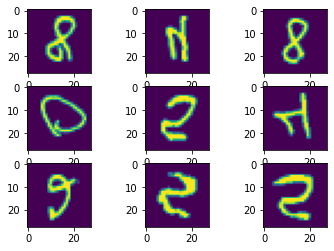

In [6]:
# Visualizing Augmented Rotated Train images

for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(rotated_train_images[i])

plt.show()

4


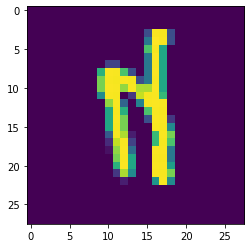

In [7]:
# Checking that labels corresponds to correct image

Rindex=1

print(rotated_train_labels[Rindex])
plt.imshow(rotated_train_images[Rindex])
plt.show()

In [8]:
# Defining the input(X) and output(y) variables for both training and testing datasets

X_train = np.vstack((original_train_images,rotated_train_images))
y_train = np.vstack((original_train_labels,rotated_train_labels)).reshape(100000,)

print('X Train :',X_train.shape)
print('y Train :',y_train.shape,'\n')
print('X Test  :',X_test.shape)
print('y Test  :',y_test.shape)

X Train : (100000, 28, 28)
y Train : (100000,) 

X Test  : (10000, 28, 28)
y Test  : (10000,)


In [9]:
# Scale images to the [0, 1] range

X_train  = X_train / 255.0
X_test = X_test / 255.0

In [10]:
# one hot encode
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [11]:
# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0         
                                                                 
 flatten (Flatten)           (None, 800)               0

In [12]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [13]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [14]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=200, callbacks=[tensorboard_callback])

Epoch 1/5
500/500 [==============================] - 33s 62ms/step - loss: 0.3592 - accuracy: 0.8875 - val_loss: 0.1035 - val_accuracy: 0.9681
Epoch 2/5
500/500 [==============================] - 31s 63ms/step - loss: 0.1144 - accuracy: 0.9644 - val_loss: 0.0770 - val_accuracy: 0.9751
Epoch 3/5
500/500 [==============================] - 31s 62ms/step - loss: 0.0785 - accuracy: 0.9752 - val_loss: 0.0526 - val_accuracy: 0.9842
Epoch 4/5
500/500 [==============================] - 34s 68ms/step - loss: 0.0624 - accuracy: 0.9800 - val_loss: 0.0512 - val_accuracy: 0.9831
Epoch 5/5
500/500 [==============================] - 35s 69ms/step - loss: 0.0512 - accuracy: 0.9833 - val_loss: 0.0538 - val_accuracy: 0.9833


In [15]:
# Visualizing model on tensorboard

%tensorboard --logdir logs/fit

In [16]:
# Evaluating the Trained Model

score = model.evaluate(X_test,y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.05379863455891609
Test accuracy: 0.983299970626831


In [17]:
prediction=model.predict(X_test)
prediction

313/313 [==============================] - 2s 5ms/step


array([[8.56319993e-09, 3.26645131e-05, 1.35584905e-05, ...,
        9.99809682e-01, 3.66533726e-07, 3.03488196e-06],
       [1.49730454e-06, 4.20717515e-06, 9.78475213e-01, ...,
        1.35673842e-11, 1.40969149e-07, 1.60220188e-05],
       [2.40306326e-04, 9.98683035e-01, 1.59459611e-04, ...,
        1.83934826e-04, 1.62366967e-04, 1.28936575e-04],
       ...,
       [6.22767504e-10, 4.09160457e-08, 8.29922797e-09, ...,
        1.39804882e-07, 3.77077413e-07, 1.27418052e-05],
       [1.56057837e-07, 7.67415298e-10, 2.41573129e-04, ...,
        5.57518831e-09, 1.59150841e-05, 1.81296753e-06],
       [1.75187790e-06, 4.27606843e-13, 5.56850273e-06, ...,
        4.90363067e-13, 9.51048449e-08, 3.05297164e-07]], dtype=float32)

313/313 [==============================] - 2s 5ms/step
1
ODD Number


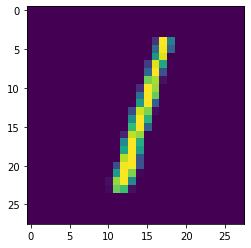

In [18]:
# Visualizing the Model Prediction

index=2

prediction=model.predict(X_test)
print(np.argmax(prediction[index]))

if (int(np.argmax(prediction[index])))%2==0:
    print('EVEN Number')
else:
    print('ODD Number')
    
plt.imshow(X_test[index])
plt.show()

In [19]:
# Saving the entire model as a saved_model

model.save(os.getcwd().replace("\\","/")+'/saved_model/MNIST')

INFO:tensorflow:Assets written to: C:/Users/anura/Desktop/MNIST/saved_model/MNIST\assets


INFO:tensorflow:Assets written to: C:/Users/anura/Desktop/MNIST/saved_model/MNIST\assets
